#CHE1147H - Data Mining in Engineering

#Programming assignment - 4

#Student name: **Ashutosh Desai**

#Student number: **1004774041**

##**1. Chemical composition of pottery**

###1.1 Data exploration with PCA

In [ ]:
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#1.
import pandas as pd
pottery = pd.read_csv('Pottery.csv')
pottery

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [ ]:
pottery.shape

(26, 7)

1. There are 7 columns
2. Al, Fe, Mg, Ca, and Na shall be used for PCA.

In [ ]:
#2.
pottery_for_PCA = pottery.drop(['Unnamed: 0', 'Site'], axis=1) #dropping unwanted columns

In [ ]:
pottery_for_PCA.fillna(pottery_for_PCA.mean(), inplace=True) #Filling null values

In [ ]:
pottery_for_PCA

,Al,Fe,Mg,Ca,Na
0,14.4,7.00,4.30,0.15,0.51
1,13.8,7.08,3.43,0.12,0.17
2,14.6,7.09,3.88,0.13,0.20
3,11.5,6.37,5.64,0.16,0.14
4,13.8,7.06,5.34,0.20,0.20
5,10.9,6.26,3.47,0.17,0.22
6,10.1,4.26,4.26,0.20,0.18
7,11.6,5.78,5.91,0.18,0.16
8,11.1,5.49,4.52,0.29,0.30
9,13.4,6.92,7.23,0.28,0.20


In [ ]:
#Standardization
pottery_scaled = StandardScaler().fit_transform(pottery_for_PCA)

In [ ]:
pottery_scaled.mean(axis=0)

array([5.12410627e-17, 1.70803542e-17, 4.27008856e-17, 3.84307970e-17,
       5.97812398e-17])

In [ ]:
pottery_scaled.std(axis=0)

array([1., 1., 1., 1., 1.])

In [ ]:
#perform pca
pca = PCA(n_components=3, svd_solver='full')
pca_pottery = pca.fit(pottery_scaled)

In [ ]:
#3.
#Finding explained variance
exp_var = pca_pottery.explained_variance_ratio_*100

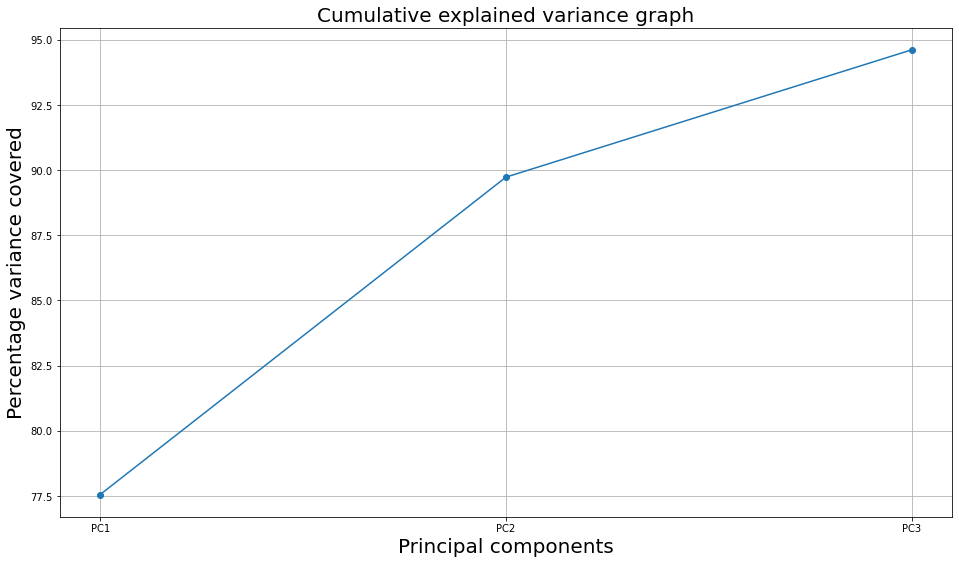

In [ ]:
#Cumulative explained variance graph
x = ['PC1','PC2','PC3']
plt.figure(figsize=(16,9))
plt.plot(x,np.cumsum(exp_var),'-o')
plt.title('Cumulative explained variance graph',fontsize=20)
plt.xlabel('Principal components',fontsize=20)
plt.ylabel('Percentage variance covered',fontsize=20)
plt.grid()
plt.savefig('Fig.1.1.3_Desai_Ashutosh.png')

In [ ]:
print('% of variance shown by first 2 PCs = ',np.cumsum(exp_var)[1])
print('% of variance shown by first 3 PCs = ',np.cumsum(exp_var)[2])

% of variance shown by first 2 PCs =  89.7321366378989
% of variance shown by first 3 PCs =  94.61598027980749


In [ ]:
#4.
#Finding scores.
scores_pottery = pca_pottery.transform(pottery_scaled)

In [ ]:
scores_pottery_df = pd.DataFrame(data = scores_pottery[:,0:2]
                         ,columns = ['PC1', 'PC2']
                         ,index = pottery_for_PCA.index)

In [ ]:
scores_pottery_df

,PC1,PC2
0,-1.778026,2.289445
1,-0.611193,0.122065
2,-0.722428,0.370209
3,-1.417696,-0.555600
4,-1.486801,-0.004081
5,-1.259044,-0.092347
6,-1.180703,-0.607921
7,-1.490385,-0.498745
8,-2.076010,0.000500
9,-2.311320,-0.376341


In [ ]:
#Finding loadings
loadings_pottery = pca_pottery.components_.T

In [ ]:
#Finding loadings
loadings_pottery_df = pd.DataFrame(data = loadings_pottery[:,0:2]
                           ,columns = ['PC1', 'PC2']
                           ,index = pottery_for_PCA.columns)

In [ ]:
loadings_pottery_df

,PC1,PC2
Al,0.445434,0.356524
Fe,-0.478132,0.041175
Mg,-0.486541,-0.049607
Ca,-0.449054,-0.344146
Na,-0.366888,0.866197


In [ ]:
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scores_pottery_df['Site'] = pottery['Site']

In [ ]:
scores_pottery_df

,PC1,PC2,Site
0,-1.778026,2.289445,Llanedyrn
1,-0.611193,0.122065,Llanedyrn
2,-0.722428,0.370209,Llanedyrn
3,-1.417696,-0.555600,Llanedyrn
4,-1.486801,-0.004081,Llanedyrn
5,-1.259044,-0.092347,Llanedyrn
6,-1.180703,-0.607921,Llanedyrn
7,-1.490385,-0.498745,Llanedyrn
8,-2.076010,0.000500,Llanedyrn
9,-2.311320,-0.376341,Llanedyrn


In [ ]:
def myplot(loadings,loading_labels=None):

    n = loadings.shape[0] #total number of features
 
    # adjusting the loadings to fit in (-1,1)
    p = loadings #all loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
        
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC {}".format(1), fontsize=20);
    plt.ylabel("PC {}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

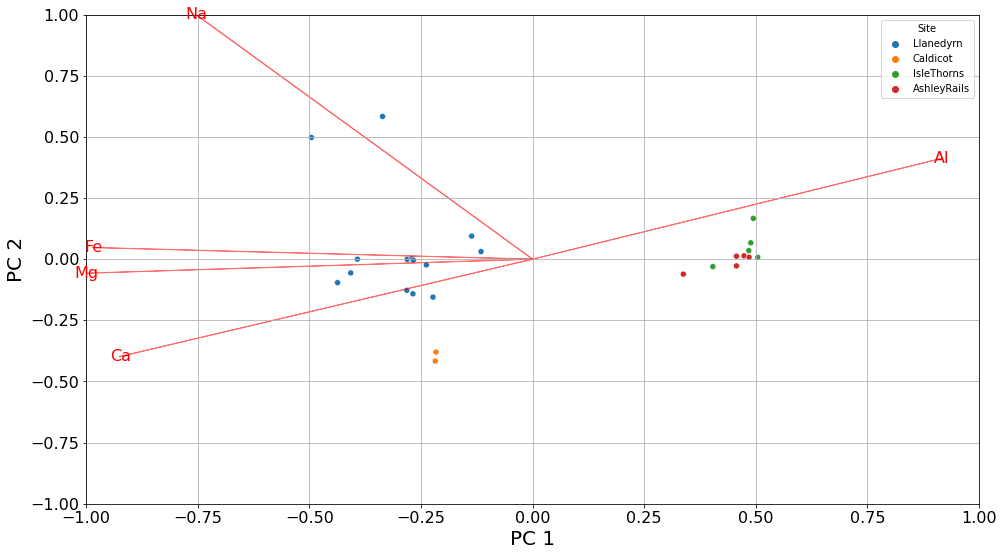

In [ ]:
plt.figure(figsize=(16,9))
#Calling function for loadings plot
myplot(loadings_pottery[:,0:2],loading_labels=loadings_pottery_df.index)

#Scores plot
xt = scores_pottery_df.PC1 #all pc1 scores
yt = scores_pottery_df.PC2 #all pc2 scores

scalext = 1.0/(xt.max() - xt.min())
scaleyt = 1.0/(yt.max() - yt.min())

xt_scaled = xt * scalext #real value / (max value - min value)
yt_scaled = yt * scaleyt #real value / (max value - min value)

scores_pottery_df['x scaled'] = xt_scaled
scores_pottery_df['y scaled'] = yt_scaled

sns.scatterplot(data=scores_pottery_df, x="x scaled", y="y scaled", hue="Site")
plt.savefig('Fig.1.1.4_Desai_Ashutosh.png')

5.) The map shown above shows scores of raw material taken from Isle Thorns and Ashley Rails in a single cluster. Thus, these points showing similar characteristics, represent the raw materials for product B.

6.) The raw material from Caldicot **is** a good replacement for Llanedyrn because the sample points, when observed with PC-1 & PC-2 (2D-plot shown above), are slightly south of the Llanedyrn cluster. However, the plot observed with PC-1, PC-2 & PC-3 (3D-plot shown below) clearly show that the Caldicot sample points are a part of the Llanedyrn cluster.

7.) The biggest differences between the two big clusters are that for Isle Thorns and Ashley Rails cluster (Cluster 2), the Aluminium concentration is above average which is not the case for the Llanedyrn cluster (Cluster 1). However, for cluster 1 samples, the concentration of Sodium, Ferrous, Magnesium and Calcium concentration in above average and for cluster 2, it is below average.

According to the map shown above, the 2 Caldicot samples are south of the Cluster 1. One of the reason can be low Sodium content in the sample.

In [ ]:
#Plot for 3 PCs to get a better understanding of clustering for question 6.
scores_pottery_df_3D = pd.DataFrame(data = scores_pottery[:,0:3]
                         ,columns = ['PC1', 'PC2','PC3']
                         ,index = pottery_for_PCA.index)

scores_pottery_df_3D

,PC1,PC2,PC3
0,-1.778026,2.289445,-0.075289
1,-0.611193,0.122065,-0.499044
2,-0.722428,0.370209,-0.207550
3,-1.417696,-0.555600,-0.557590
4,-1.486801,-0.004081,0.195248
5,-1.259044,-0.092347,-0.783259
6,-1.180703,-0.607921,-0.575010
7,-1.490385,-0.498745,-0.336582
8,-2.076010,0.000500,0.220714
9,-2.311320,-0.376341,0.800851


In [ ]:
scores_pottery_df_3D['Site'] = pottery['Site']

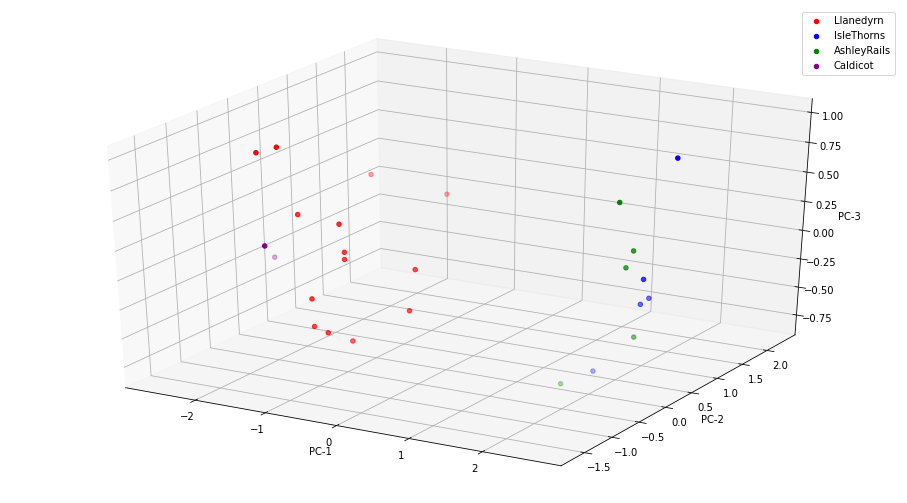

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'Llanedyrn'].PC1, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'Llanedyrn'].PC2, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'Llanedyrn'].PC3, c='red',label='Llanedyrn')
ax.scatter(scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'IsleThorns'].PC1, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'IsleThorns'].PC2, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'IsleThorns'].PC3, c='blue',label='IsleThorns')
ax.scatter(scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'AshleyRails'].PC1, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'AshleyRails'].PC2, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'AshleyRails'].PC3, c='green',label='AshleyRails')
ax.scatter(scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'Caldicot'].PC1, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'Caldicot'].PC2, scores_pottery_df_3D[scores_pottery_df_3D['Site'] == 'Caldicot'].PC3, c='purple',label='Caldicot')

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
plt.legend()
plt.savefig('Fig.1.1.6_Desai_Ashutosh.png')

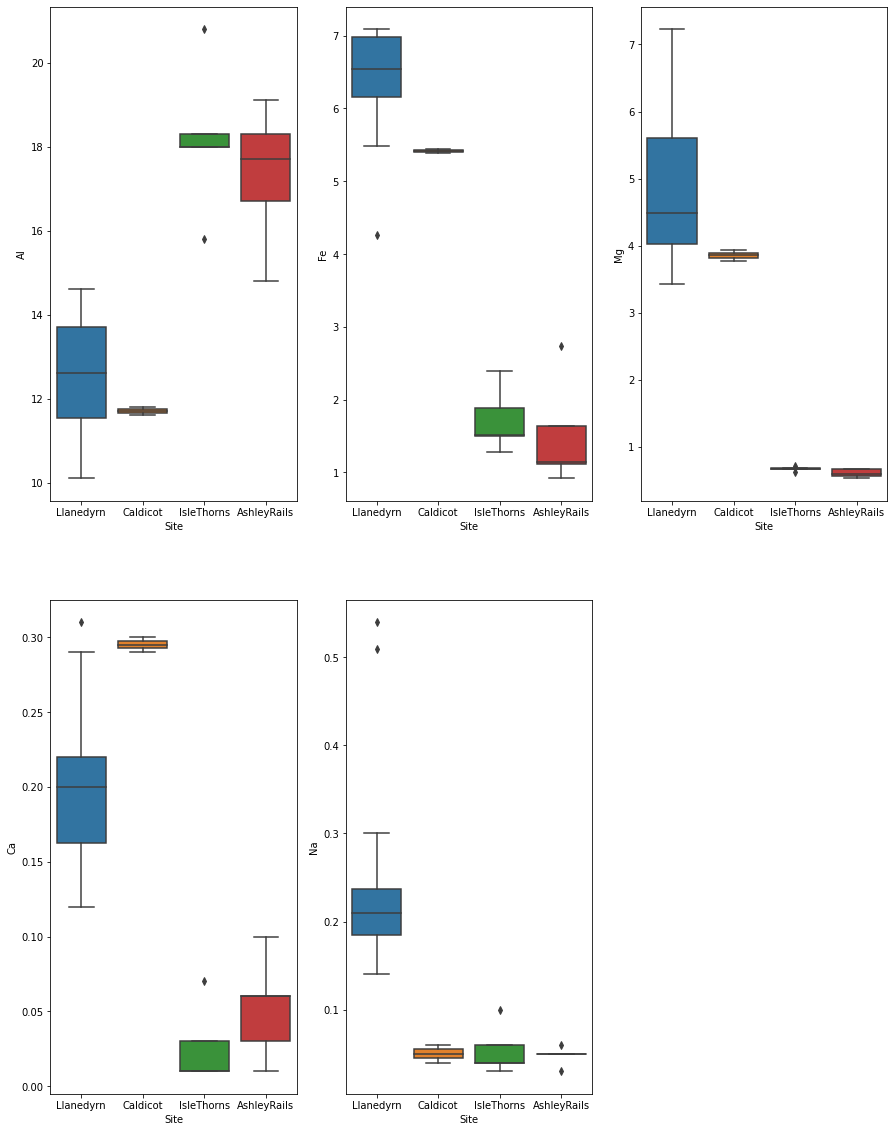

In [ ]:
#8. Boxplot
plt.figure(figsize=(15,20))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x='Site', y='Al', data=pottery)
plt.subplot(2, 3, 2)
ax = sns.boxplot(x='Site', y='Fe', data=pottery)
plt.subplot(2, 3, 3)
ax = sns.boxplot(x='Site', y='Mg', data=pottery)
plt.subplot(2, 3, 4)
ax = sns.boxplot(x='Site', y='Ca', data=pottery)
plt.subplot(2, 3, 5)
ax = sns.boxplot(x='Site', y='Na', data=pottery)
plt.savefig('Fig.1.1.8_Desai_Ashutosh.png')

In this problem, we reduced the number of variables from 5 to 2 in order
to visualize the characteristics captured in the 5 variables. With more than 5 variables you
realize that it becomes dicult to visualize and compare the dierent samples. Dimension
reduction methods like PCA are crucial to understand multivariate data. Conventional
statistical analysis like the boxplot shown here do not show the correlations between the
variables which are simply captured in the PCA plots you created.